In [335]:
                                      # Feature Extraction And Price Prediction For Mobile Phones#

# importing important libraries to start the project and to upload the Dataset #

In [336]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris 
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression



In [337]:
# Uploading the Dataset in terminal( Data acquisition )


In [338]:
Mobile_dataset = pd.read_csv(r"C:\Users\ACER\OneDrive\Desktop\PROJECT DATASETS\Processed_Flipdata.csv",index_col= 0)

In [339]:
Mobile_dataset

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...
637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [340]:
#Data Preprocessing#

In [341]:

Mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 642
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 50.7+ KB


In [342]:

# Remove commas and convert Prize column to integer

Mobile_dataset['Prize'] = Mobile_dataset['Prize'].str.replace(',', '').astype(int)


In [343]:
Mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 642
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    int32  
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 48.6+ KB


In [344]:

Mobile_dataset.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


In [345]:
Mobile_dataset.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [346]:
# finding missing values and droping dulpicates and null values 

In [347]:
Mobile_dataset.isnull()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
637,False,False,False,False,False,False,False,False,False,False,False
638,False,False,False,False,False,False,False,False,False,False,False
639,False,False,False,False,False,False,False,False,False,False,False
641,False,False,False,False,False,False,False,False,False,False,False


In [348]:
Mobile_dataset.drop_duplicates()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


In [349]:
Mobile_dataset.dropna(inplace =True)

In [350]:
Mobile_dataset

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


In [351]:
#  fill missing categorical values with mode
Mobile_dataset.fillna(Mobile_dataset.mode().iloc[0], inplace=True)

In [352]:
#  rows with at least 80% of data
Mobile_dataset.dropna(thresh=0.8 * len(Mobile_dataset.columns), inplace=True)

In [353]:
Mobile_dataset.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize'],
      dtype='object')

In [354]:
# Identify categorical columns#

In [355]:
categorical_columns = Mobile_dataset.select_dtypes(include=['object']).columns


In [356]:
categorical_columns

Index(['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_'], dtype='object')

In [357]:
categorical_cols = ['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_' ]


In [358]:

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each catagorical column

for column in categorical_cols:
    Mobile_dataset[column] = le.fit_transform(Mobile_dataset[column])

print(Mobile_dataset)

     Model  Colour  Memory  RAM  Battery_  Rear Camera  Front Camera  AI Lens  \
0       23     159      64    4      6000            3            10        1   
1       23      20      64    4      6000            3            10        1   
2       37     149     128    8      5000           10             4        0   
3       69     201      32    2      5000           13            10        0   
4       12     130     128    8      5000           10            10        1   
..     ...     ...     ...  ...       ...          ...           ...      ...   
637    118      49     256    8      3900           10             2        0   
638     32      52      32    2      3100           11             6        0   
639    123     259      64    4      5000           10            12        0   
641    110      17     128    8      5000           10             7        0   
642     59     215     128    4      5000           10            12        0   

     Mobile Height  Process

In [359]:
Mobile_dataset

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,23,159,64,4,6000,3,10,1,16.76,113,7299
1,23,20,64,4,6000,3,10,1,16.76,113,7299
2,37,149,128,8,5000,10,4,0,16.64,75,11999
3,69,201,32,2,5000,13,10,0,16.56,56,5649
4,12,130,128,8,5000,10,10,1,16.76,14,8999
...,...,...,...,...,...,...,...,...,...,...,...
637,118,49,256,8,3900,10,2,0,15.49,89,79999
638,32,52,32,2,3100,11,6,0,12.70,68,5998
639,123,259,64,4,5000,10,12,0,16.76,35,9990
641,110,17,128,8,5000,10,7,0,16.26,11,38999


In [360]:
       
                                                       # Univariate analysis #

In [361]:
Mobile_dataset['Prize'].describe()

count      541.000000
mean     16228.375231
std      10793.588322
min        920.000000
25%       9290.000000
50%      13499.000000
75%      19280.000000
max      80999.000000
Name: Prize, dtype: float64

In [362]:
                                             # Distrubution of mobile price #

(array([111., 236., 114.,  43.,  19.,   7.,   7.,   0.,   0.,   4.]),
 array([  920. ,  8927.9, 16935.8, 24943.7, 32951.6, 40959.5, 48967.4,
        56975.3, 64983.2, 72991.1, 80999. ]),
 <BarContainer object of 10 artists>)

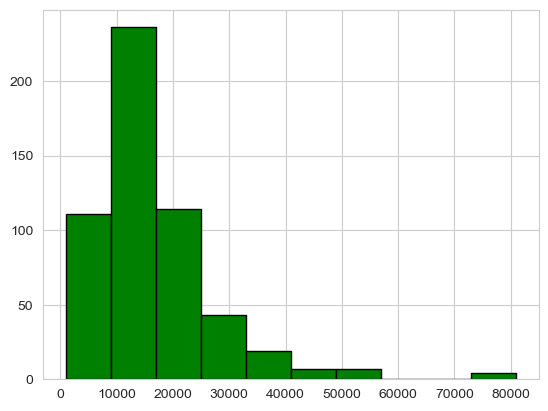

In [363]:
plt.hist(Mobile_dataset['Prize'], color='green',edgecolor= 'black')

In [364]:
# average of the mobile prize  is  16228
# highest prize of the mobile is 80999
# There are less numbers of mobile phones in the higher value catogory 


In [365]:
                                                             # Battery # 

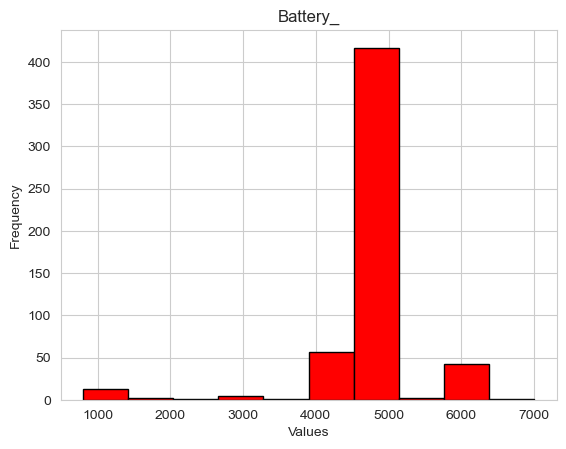

In [366]:
plt.hist(Mobile_dataset['Battery_'], color='red',edgecolor= 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Battery_')
plt.show()

In [367]:
Mobile_dataset['Battery_'].describe()

count     541.000000
mean     4871.587800
std       780.148862
min       800.000000
25%      5000.000000
50%      5000.000000
75%      5000.000000
max      7000.000000
Name: Battery_, dtype: float64

In [368]:
# average size of the battery is 4871 mah 
# max size of the battery is 7000
# minimum size of the battery is 800 MAH 
# most number of battery are in the range of 4k  to 6k 
# maximum batteries are in 5000 catagory 

In [369]:
                                                       # RAM #


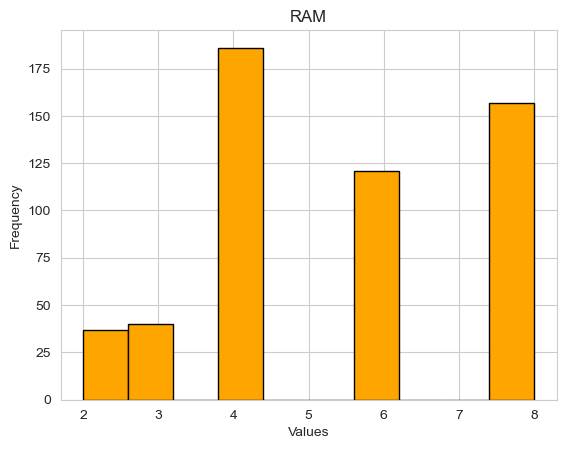

In [370]:
plt.hist(Mobile_dataset['RAM'], color='orange',edgecolor= 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('RAM')
plt.show()

In [371]:
Mobile_dataset['RAM'].describe()

count    541.000000
mean       5.397412
std        1.984923
min        2.000000
25%        4.000000
50%        6.000000
75%        8.000000
max        8.000000
Name: RAM, dtype: float64

In [372]:
# max size of the RAM is 8GB
# Min size of the RAM IS 2 GB 
# Average size of the RAM is 5 GB
# Most numbers of mobiles are of 4 GB Ram Catogory 

In [373]:
                                                 # Memory #


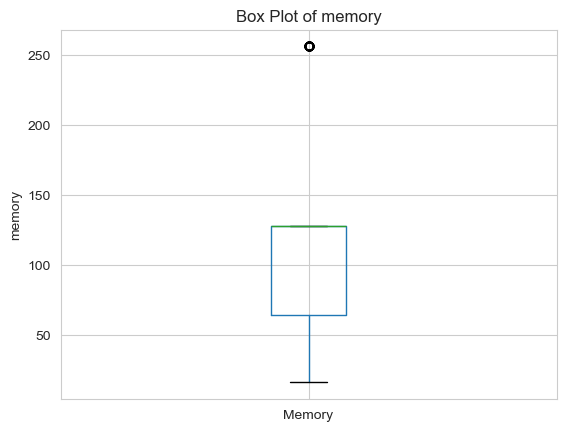

In [374]:
 # Ploting The Box Plot for Memory Column # 
Mobile_dataset.boxplot(column='Memory')
plt.title('Box Plot of memory')
plt.ylabel('memory')
plt.show()


In [375]:
Mobile_dataset['Memory'].describe()

count    541.000000
mean     110.550832
std       60.600694
min       16.000000
25%       64.000000
50%      128.000000
75%      128.000000
max      256.000000
Name: Memory, dtype: float64

In [376]:
# Higest memory size is 256 GB
# while lowest memory size is 16 GB 


In [377]:
                                        # Mobile Height # 

In [378]:
Mobile_dataset['Mobile Height'].describe()

count    541.000000
mean      16.431201
std        2.523553
min        4.500000
25%       16.510000
50%       16.710000
75%       16.940000
max       41.940000
Name: Mobile Height, dtype: float64

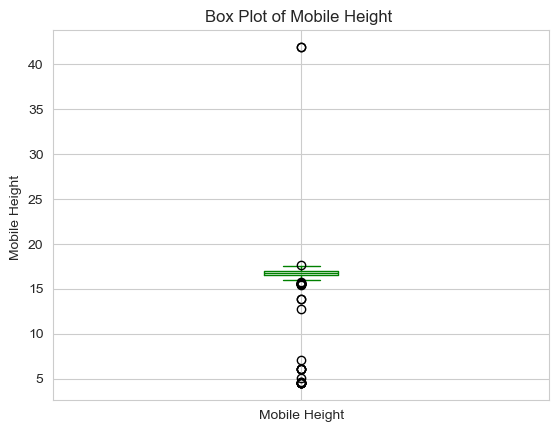

In [379]:
Mobile_dataset.boxplot(column='Mobile Height', color = 'green')
plt.title('Box Plot of Mobile Height ')
plt.ylabel('Mobile Height ')
plt.show()


In [380]:
# minimum Height of the mobile phone is  4.5 
# maximum Height of the mobile phone is 41.94

In [381]:
                                        # AI lens # 

In [382]:
Mobile_dataset['AI Lens'].describe()

count    541.000000
mean       0.062847
std        0.242911
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: AI Lens, dtype: float64

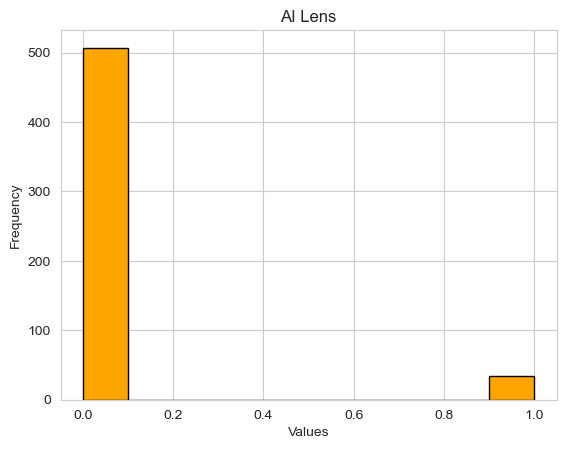

In [383]:
plt.hist(Mobile_dataset['AI Lens'], color='Orange',edgecolor= 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('AI Lens')
plt.show()

In [384]:
# most of the mobile phones does not have AI lens .
# Maximum size of AI lens is 1 

In [385]:
                                                         # Processor_ # 


In [386]:
Mobile_dataset['Processor_'].describe()

count    541.000000
mean      61.528651
std       32.456318
min        0.000000
25%       40.000000
50%       59.000000
75%       83.000000
max      122.000000
Name: Processor_, dtype: float64

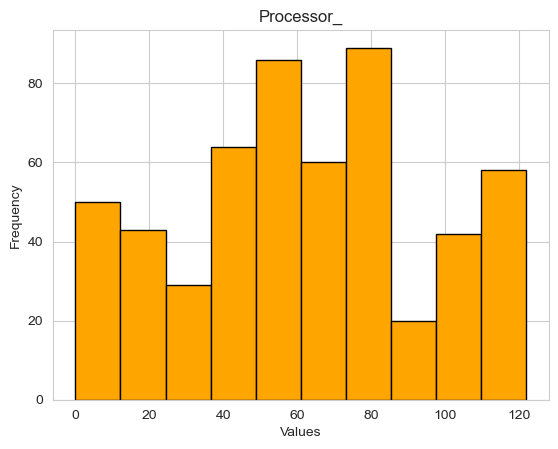

In [387]:
plt.hist(Mobile_dataset['Processor_'], color='Orange',edgecolor= 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Processor_')
plt.show()

In [388]:
# maximum size of process is 122
# The average processor Size is 61 

In [389]:

# Bivariate Analysis Of variabls in the Dataset #

In [390]:
                                                 # Memory and price # 

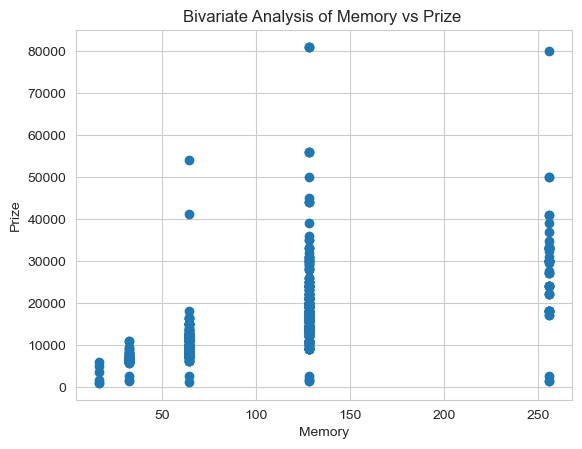

Correlation between Memory  and Prize: 0.5666597361136086


In [391]:

# Scatter plot to visualize the relationship
plt.scatter(Mobile_dataset['Memory'], Mobile_dataset['Prize'])
plt.xlabel('Memory')
plt.ylabel('Prize')
plt.title('Bivariate Analysis of Memory vs Prize ')
plt.show()

# Calculate correlation coefficient
correlation = Mobile_dataset['Memory'].corr(Mobile_dataset['Prize'])
print(f"Correlation between Memory  and Prize: {correlation}")


In [392]:
# Higher the memory size higher the prize of the Mobile and vice- versa.
# Most number of mobile phones memory ranges between 100 to 150 around 128 


In [393]:
                                        # Battery and prize #

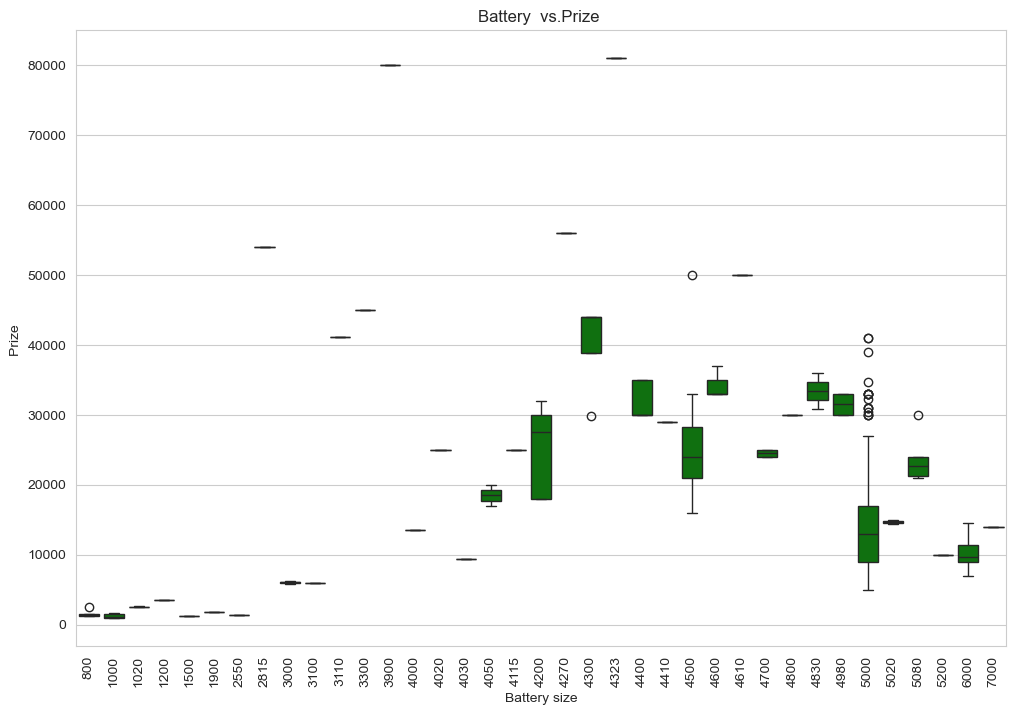

In [394]:
plt.figure(figsize=(12, 8))
sns.boxplot(x= Mobile_dataset['Battery_'], y=Mobile_dataset['Prize'], color = 'green')
plt.xticks(rotation=90)
plt.title("Battery  vs.Prize ")
plt.xlabel("Battery size")
plt.ylabel("Prize ")
plt.show()

In [395]:
# There is a Direct Corraltion Between Battery Size and prize of the phone #


In [396]:
                                          # RAM and prize # 

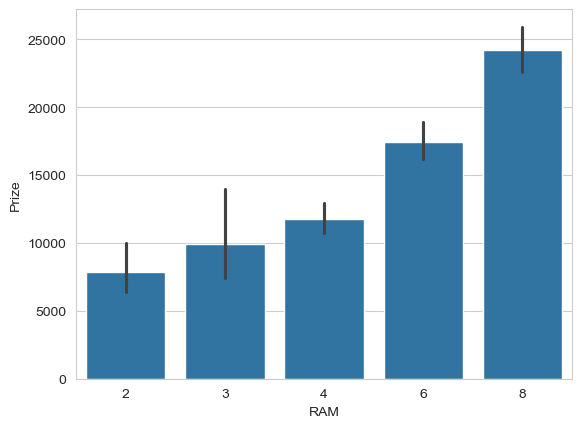

In [397]:

sns.barplot(x='RAM', y='Prize', data=Mobile_dataset, )
plt.show()


In [398]:
# Higher the Ram Size Higher is the Price of the Mobile Phone # 
# most mumber of phone are in the 8gb catogory # 

In [399]:
                                            # Memory and RAM # 


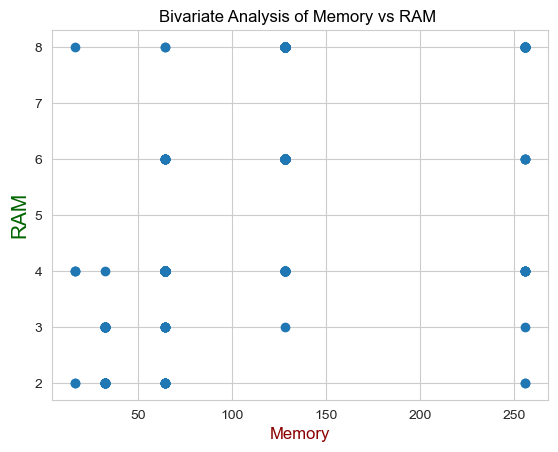

Correlation between Memory  and RAM: 0.6252843303639526


In [400]:
                                      # Scatter plot to visualize the relationship # 
plt.scatter(Mobile_dataset['Memory'], Mobile_dataset['RAM'])
plt.xlabel('Memory',fontsize=12, color='darkred')
plt.ylabel('RAM',fontsize=15, color='darkgreen')
plt.title('Bivariate Analysis of Memory vs RAM ', color='black')
plt.show()

# Calculate correlation coefficient
correlation = Mobile_dataset['Memory'].corr(Mobile_dataset['RAM'])
print(f"Correlation between Memory  and RAM: {correlation}")

In [401]:
# There is Direct Correlation Between Ram and memory Size # 
# There are lesser number of phones in higher Memory Catogory # 


In [402]:
                                              # Multivariate Analysis #

In [403]:
#  creating a Pairplot for all Variables # 

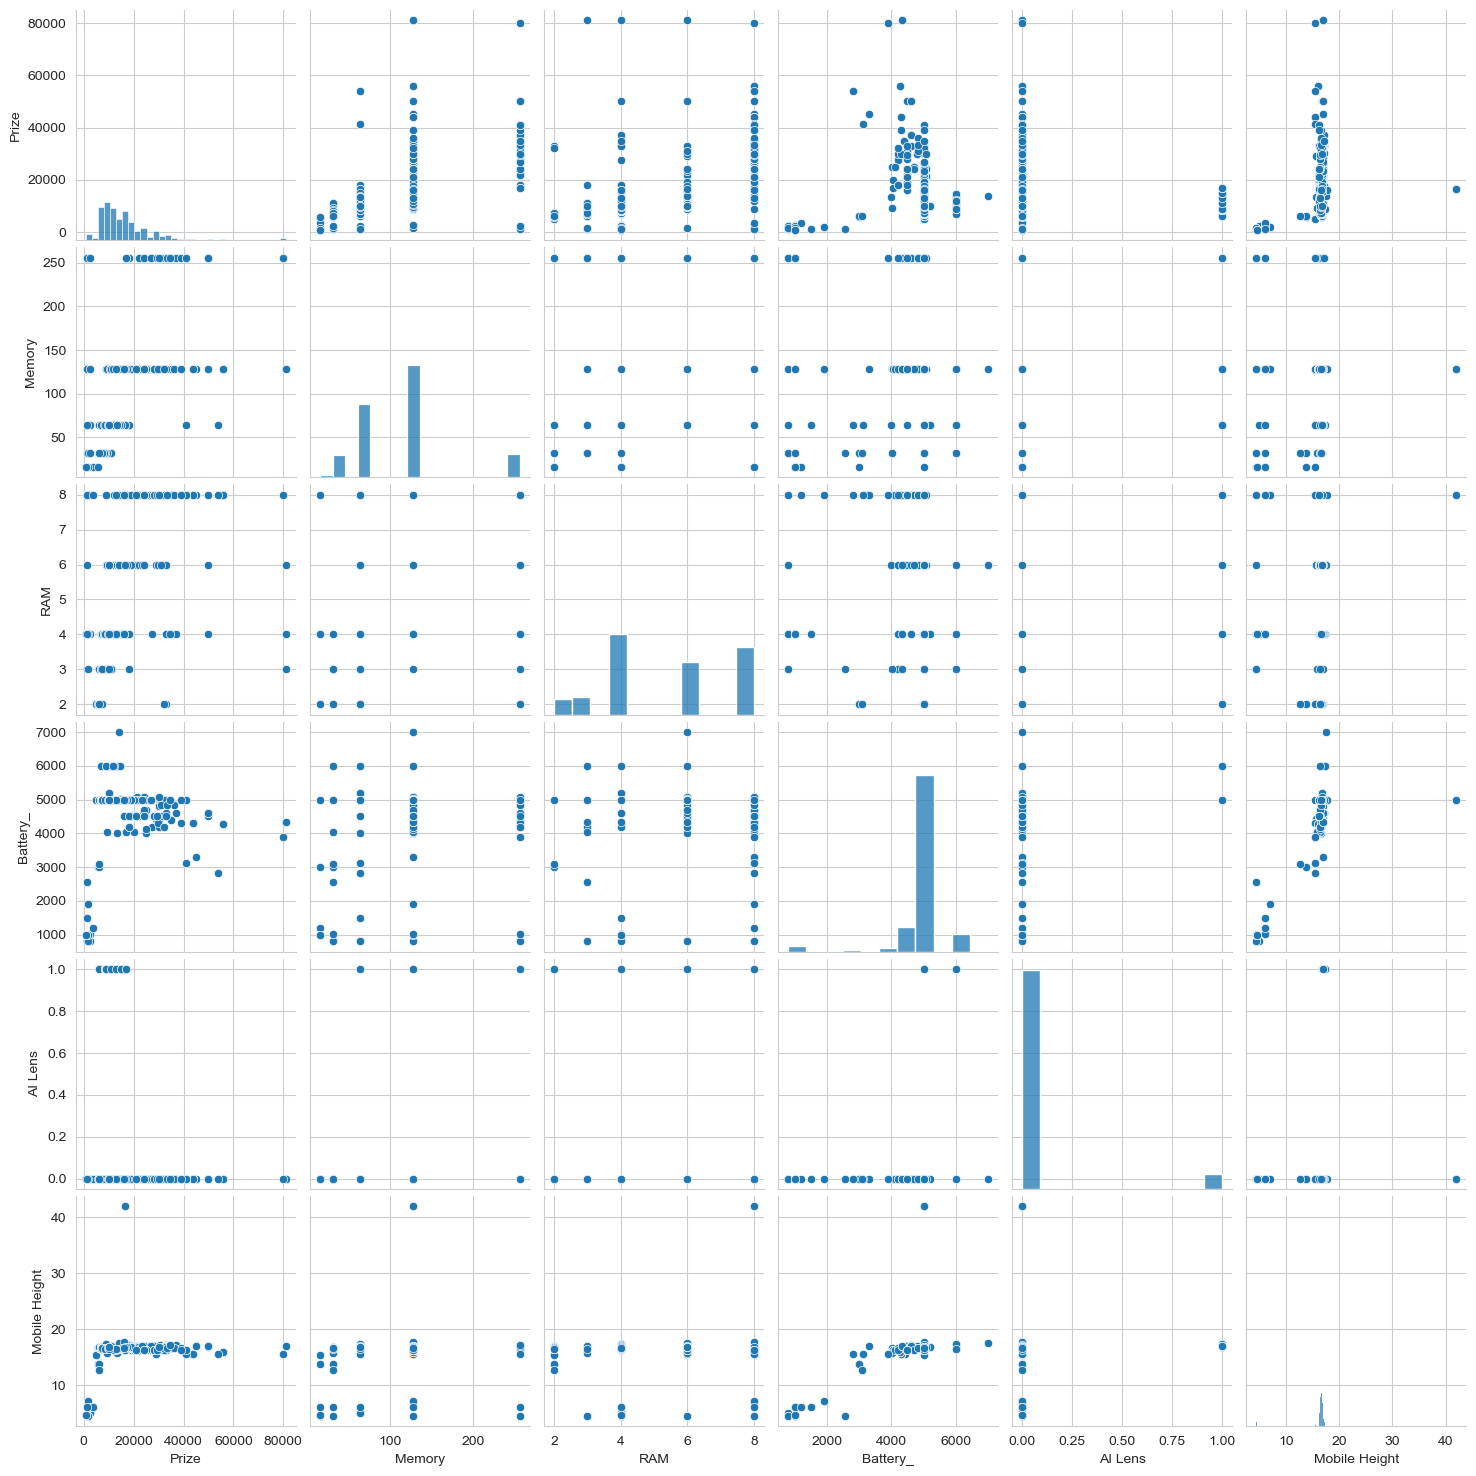

In [404]:
plt.close();
sns.pairplot(Mobile_dataset[['Prize', 'Memory', 'RAM', 'Battery_','AI Lens','Mobile Height',]])
sns.set_style('whitegrid')
plt.show()


In [405]:
# Most of the Variable are impacting the price 
# Variable such as Battery , Ram ,Height , Memory are Correlated withe Price # 

In [406]:
                                 # After Multivariate Analysis will start with Feature Extraction #
                                                  # Feature Extraction#

In [407]:
# Will Start with  Correlation Analysis # 
# correlation analysis # 

In [408]:
Mobile_dataset.corr()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
Model,1.000000,0.106594,0.036055,0.005924,-0.090875,0.046810,-0.082802,-0.396336,-0.135728,0.036362,-0.075163
Colour,0.106594,1.000000,0.042121,0.064503,0.027350,0.068766,-0.005653,-0.030308,0.016014,-0.068677,0.038895
Memory,0.036055,0.042121,1.000000,0.625284,-0.053210,-0.021172,-0.380910,-0.094442,0.063163,-0.149665,0.566660
RAM,0.005924,0.064503,0.625284,1.000000,-0.104923,-0.024422,-0.435425,-0.082622,0.092951,-0.108733,0.532024
Battery_,-0.090875,0.027350,-0.053210,-0.104923,1.000000,0.255043,0.405750,0.150156,0.695641,-0.136305,-0.034297
Rear Camera,0.046810,0.068766,-0.021172,-0.024422,0.255043,1.000000,0.111926,-0.019088,0.242702,-0.032366,-0.019597
Front Camera,-0.082802,-0.005653,-0.380910,-0.435425,0.405750,0.111926,1.000000,0.156066,0.237706,-0.124950,-0.333833
AI Lens,-0.396336,-0.030308,-0.094442,-0.082622,0.150156,-0.019088,0.156066,1.000000,0.052018,-0.112740,-0.153691
Mobile Height,-0.135728,0.016014,0.063163,0.092951,0.695641,0.242702,0.237706,0.052018,1.000000,-0.036817,0.176009
Processor_,0.036362,-0.068677,-0.149665,-0.108733,-0.136305,-0.032366,-0.124950,-0.112740,-0.036817,1.000000,-0.050244


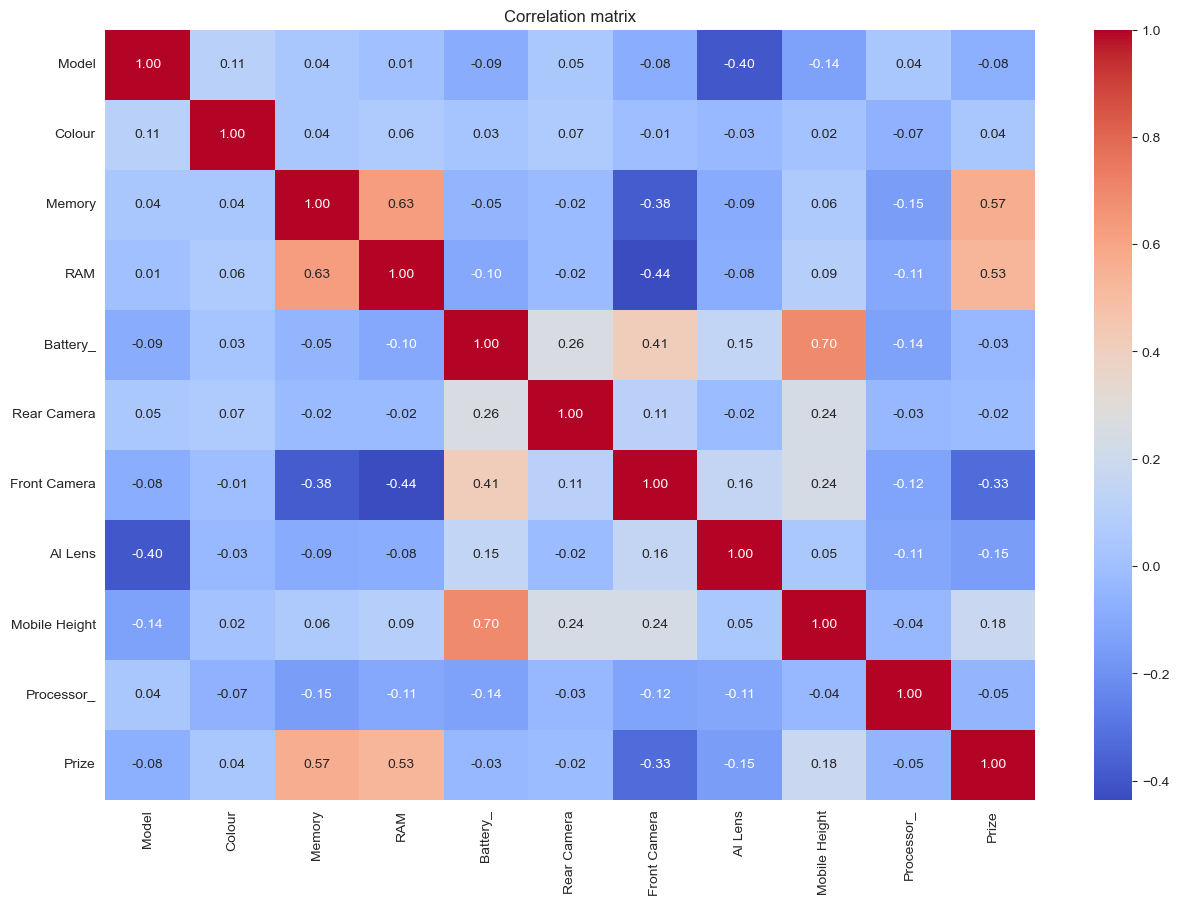

In [409]:
correlation_matrix = Mobile_dataset.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='00.2f')
plt.title("Correlation matrix")
plt.show()

In [410]:
# There is strong positive correlation between , RAM , MEMORY , HEIGHT and prize # 
# while there is a Negative Correlation Between model, battery , front camera  and AI lens With prize #

In [411]:
 # Outliers in the Dataset
# Outlier Detection #

In [412]:
Q1 = Mobile_dataset['Prize'].quantile(0.25)
Q3 = Mobile_dataset['Prize'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = Mobile_dataset[(Mobile_dataset['Prize'] < lower_bound) | (Mobile_dataset['Prize'] > upper_bound)]
print(outliers)

     Model  Colour  Memory  RAM  Battery_  Rear Camera  Front Camera  AI Lens  \
222    117     181     128    8      4500           10             1        0   
289    119     181     128    8      3300            2             1        0   
309     34      47     128    8      4400           10             7        0   
312      5     209     128    8      4300           12             3        0   
313      5      37     128    8      4300           12             3        0   
332      5     217     128    8      4300           12             3        0   
421    176     129     256    4      4600           10             9        0   
427     35     107     256    4      4610            5            11        0   
452      4     217     128    8      4270           10            12        0   
453      4     165     128    8      4270           10            12        0   
455     34     220     128    8      4400           10             7        0   
472      4     118     128  

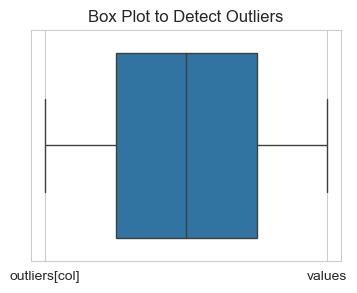

In [413]:
# Creating the Boxplot for Outlier Detection # 

plt.figure(figsize=(4, 3))
sns.boxplot(x=['outliers[col]', 'values'])
plt.title('Box Plot to Detect Outliers')
plt.show()

In [414]:
# Removing the Outliers In the Prize Column # 

Mobile_dataset_cleaned = Mobile_dataset[(Mobile_dataset['Prize'] >= lower_bound) & (Mobile_dataset['Prize'] <= upper_bound)]


In [415]:
Mobile_dataset_cleaned

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,23,159,64,4,6000,3,10,1,16.76,113,7299
1,23,20,64,4,6000,3,10,1,16.76,113,7299
2,37,149,128,8,5000,10,4,0,16.64,75,11999
3,69,201,32,2,5000,13,10,0,16.56,56,5649
4,12,130,128,8,5000,10,10,1,16.76,14,8999
...,...,...,...,...,...,...,...,...,...,...,...
633,55,96,64,4,5000,10,12,0,16.55,68,9790
636,104,119,64,3,5000,3,10,0,16.51,65,9999
638,32,52,32,2,3100,11,6,0,12.70,68,5998
639,123,259,64,4,5000,10,12,0,16.76,35,9990


In [416]:
                                                   # Feature Selection #   
# Define features and target variable #

In [417]:

X = Mobile_dataset_cleaned.drop(columns=['Prize'])
y = Mobile_dataset_cleaned['Prize'] 

In [418]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (412, 10)
X_test shape: (104, 10)


In [419]:
                                                  #Model Building#

In [420]:



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit + Transform on train
X_test = scaler.transform(X_test)  # Only Transform on test


In [421]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [422]:
# Train a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [423]:
# Predict prices on the test set
y_pred = model.predict(X_test)


In [424]:
# model evaluation #
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [425]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error:" ,rmse)
print("R² Score:", r2)


Mean Squared Error (MSE): 2708987.2797608157
Root Mean Squared Error: 1645.90014270636
R² Score: 0.9429357750675598


In [426]:
y_pred

array([12991.11      ,  7906.08      ,  8728.17      ,  8197.88      ,
       12678.94      ,  6536.495     , 21031.91      ,  9923.94666667,
       11739.9       , 10915.82      , 17614.        , 10554.82      ,
        8387.8       , 11924.        ,  9610.32      ,  8394.92      ,
        9870.3025    ,  6663.47      , 19713.73      , 16946.73      ,
       16367.86      , 30074.62      ,  7028.28      , 13118.91      ,
        6235.        , 17509.        ,  6657.555     , 24049.        ,
       21365.32      , 25948.46      ,  1553.17      , 19824.        ,
       21548.91      ,  8794.62      , 17239.        , 28531.93      ,
       10855.73      , 12751.41      ,  6536.495     , 15438.54      ,
       19999.56      ,  7023.52      ,  3126.88      , 20534.82      ,
       15641.33      , 17917.08      , 14611.81      ,  7978.95      ,
       15486.06      , 18953.55      , 13818.54      , 30635.41      ,
        7709.11      , 11070.75      , 13479.1       ,  6841.01      ,
      

In [427]:
y_test

311    10999
613     7280
513     8999
153     7961
619    13499
       ...  
167    17999
279    12990
627    12999
636     9999
330    17999
Name: Prize, Length: 104, dtype: int32

In [428]:

# Assuming y_test and y_pred are already defined

# Summary statistics
print(f"Mean of y_test: {np.mean(y_test)}")
print(f"Mean of y_pred: {np.mean(y_pred)}")
print(f"Median of y_test: {np.median(y_test)}")
print(f"Median of y_pred: {np.median(y_pred)}")



Mean of y_test: 13280.971153846154
Mean of y_pred: 13226.802190705128
Median of y_test: 11999.0
Median of y_pred: 11874.855


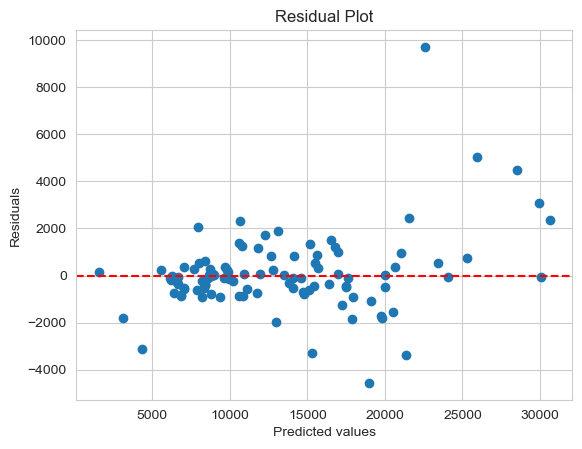

In [429]:
# Residual analysis # 
residuals = y_test - y_pred

# Plotting residuals #
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



In [430]:
 # Plot showing Predicated Values and residual Value Comparision in detail # 

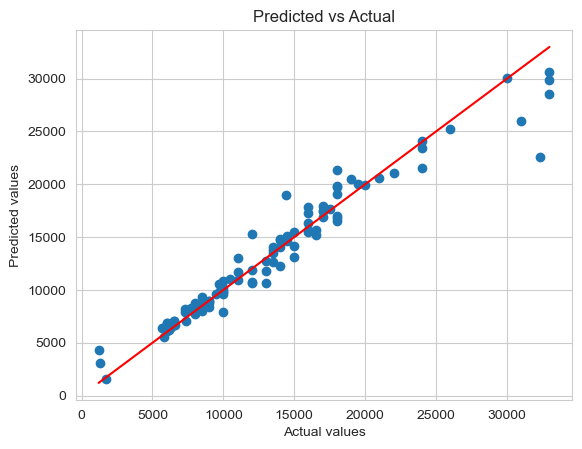

In [431]:
# Predicted vs Actual plot
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual')
plt.show()



In [432]:
# There is not much Difference in predicted and actual values # 

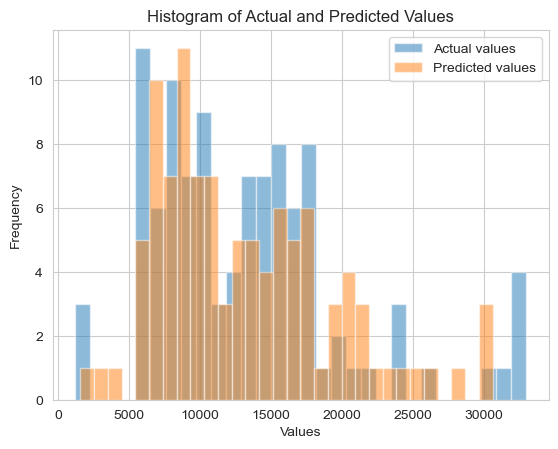

In [433]:
#  ploting A Histograms
plt.hist(y_test, bins=30, alpha=0.5, label='Actual values')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Actual and Predicted Values')
plt.legend()
plt.show()



In [434]:
# There is not much Difference in predicted and actual values # 

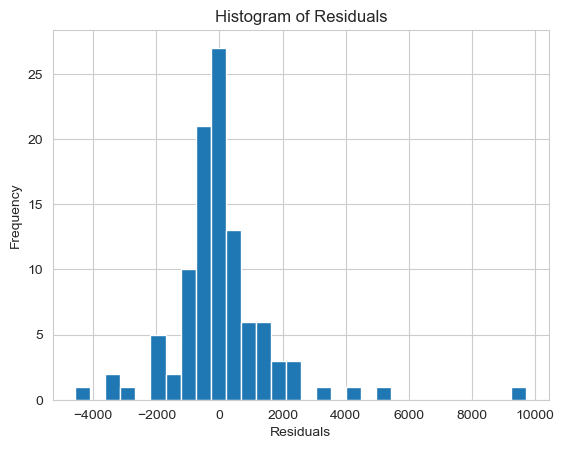

In [435]:
                                                      # Error analysis # 
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


In [436]:
# above plot showing residuals  # 

In [437]:
                                                       # Feature Importance #
feature_importances = model.feature_importances_



In [438]:
feature_names = Mobile_dataset.drop(columns=['Prize']).columns

In [439]:
importances = model.feature_importances_

In [440]:
# Create a DataFrame for visualization #
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

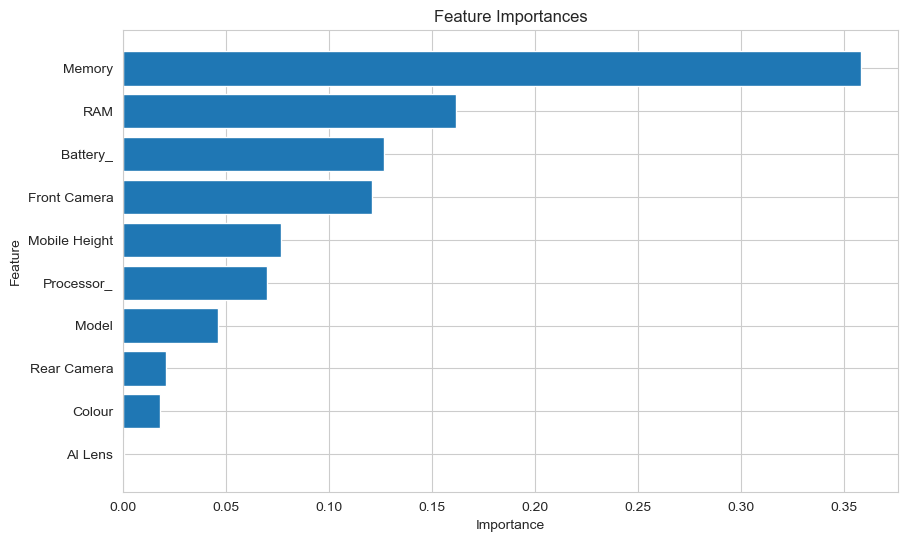

In [441]:

# Plot feature importances #
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [442]:
# RAM and Memory are the two most importance Feature that impact  the price most  # 
# followed by Front Camera and battery , processor , model   # 
# Ai lens  is of least importance # 

In [443]:
                                           #  Hyperparameter Tuning  #

In [444]:
#   with Grid Search # 

In [445]:
GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')



GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [446]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],  
    'max_depth': [None, 10, 20,],  
    'min_samples_split': [2, 5, 10],
    

}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)


In [447]:
grid_search = GridSearchCV(model, param_grid, cv=5)


In [448]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [449]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Model:", best_model)


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Best Model: RandomForestClassifier(max_depth=20, n_estimators=50)


In [450]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.6826923076923077


In [451]:
rf_model = RandomForestClassifier(class_weight='balanced')


In [452]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.5729356450191008


In [453]:
y_pred

array([14999,  6794,  8999,  7299, 13499,  6599, 21999, 12499, 10999,
       10999, 17499, 10943,  8999, 11999,  9499,  7999,  9999,  6599,
       16999, 16999, 15999, 29999,  6999, 14999,  6199, 16999,  6999,
       23999, 17999, 30385,   920, 17999, 23999,  7999, 15999, 32999,
        9999, 11499,  6599, 14999, 19499,  6499,  1299, 18999, 16499,
       16999, 14499,  8999, 15999, 18999, 13490, 32999,  8940, 10499,
       13499,  6499, 11999, 13999,  8449,  6599,   920, 13499,  5999,
       13999, 17999,  8999,  7749, 20999,  8499,  7299,  7999, 25999,
       15999, 19999,  9999, 15999, 13999, 32999, 11980,  6299, 16999,
       17999,  8995, 14490, 11999,  8999,  7999, 10499, 17499,  5990,
        9999,  6299,  8749, 23999,  9999, 23999,  6499,  5999, 14999,
       12999, 12989, 15999,  7299, 14999])

In [454]:
print("Unique Predictions:", set(y_pred))


Unique Predictions: {8449, 7299, 10499, 20999, 6794, 9999, 25999, 1299, 14999, 920, 14490, 9499, 6299, 19999, 14499, 8995, 8999, 19499, 8749, 29999, 13999, 30385, 13490, 8499, 6199, 18999, 13499, 12989, 7999, 10943, 23999, 7749, 6599, 12999, 11980, 17999, 12499, 6999, 17499, 11999, 6499, 5990, 16999, 32999, 11499, 8940, 21999, 5999, 16499, 10999, 15999}


In [455]:

results = pd.DataFrame(grid_search.cv_results_)
print(results)


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.051349      0.014819         0.007811        0.006914   
1        0.164486      0.007676         0.011056        0.006292   
2        0.336609      0.008588         0.014872        0.001850   
3        0.041248      0.019530         0.007352        0.004484   
4        0.146376      0.007915         0.007916        0.007069   
5        0.301954      0.017646         0.003151        0.006303   
6        0.031664      0.000266         0.001560        0.003119   
7        0.124698      0.004197         0.015816        0.000068   
8        0.263698      0.007491         0.006392        0.007829   
9        0.031629      0.000066         0.003153        0.006306   
10       0.145352      0.014093         0.010996        0.006351   
11       0.280098      0.040962         0.011094        0.006310   
12       0.028347      0.006239         0.006393        0.007830   
13       0.133498      0.008236         0.007709

In [456]:
print(grid_search.best_params_)


{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}


In [457]:
print(grid_search.best_score_)


0.5729356450191008


In [458]:
best_model = grid_search.best_estimator_


In [459]:
best_model

RandomForestClassifier(max_depth=20, n_estimators=50)

In [460]:
results = results.sort_values(by='mean_test_score', ascending=False)
print(results[['mean_test_score', 'std_test_score', 'params']])


    mean_test_score  std_test_score  \
19         0.572936        0.032075   
2          0.570467        0.046327   
20         0.570438        0.027481   
1          0.546195        0.029069   
11         0.534117        0.035414   
4          0.522039        0.050369   
10         0.521863        0.045485   
22         0.519453        0.034121   
23         0.509785        0.041477   
5          0.509785        0.042771   
18         0.509668        0.025726   
0          0.492771        0.032097   
13         0.473406        0.031258   
14         0.473376        0.028877   
21         0.463620        0.035936   
9          0.453952        0.057973   
8          0.434558        0.031359   
12         0.432177        0.031222   
25         0.432177        0.036493   
7          0.424890        0.039556   
3          0.424860        0.049737   
26         0.415192        0.037062   
17         0.403115        0.036005   
16         0.395798        0.038203   
24         0.366706      

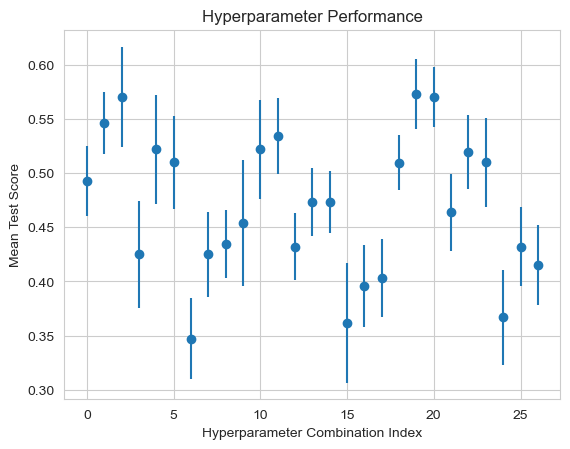

In [461]:


plt.errorbar(results.index, results['mean_test_score'], yerr=results['std_test_score'], fmt='o')
plt.title('Hyperparameter Performance')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Mean Test Score')
plt.show()


In [462]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error:" ,rmse)
print("R² Score:", r2)

Mean Squared Error (MSE): 2708987.2797608157
Root Mean Squared Error: 1645.90014270636
R² Score: 0.9429357750675598


In [463]:
# loan iris 
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable

# Create KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42) 

# Model (e.g., Random Forest)
model = RandomForestClassifier()

# Cross-validation scores
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy') 

# Print results
print("Accuracy for each fold: ", scores)
print("Mean validation accuracy: ", scores.mean())


Accuracy for each fold:  [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean validation accuracy:  0.9600000000000002


In [464]:
 # save the model # 

import joblib
joblib.dump(grid_search.best_estimator_, 'best_random_forest_model.pkl')


['best_random_forest_model.pkl']

In [465]:
                                                         # linear Regression  Model # 

In [466]:
# Define feature and target variable #

In [467]:

X = Mobile_dataset_cleaned[['Model', 'Colour', 'Memory','RAM','Battery_','Rear Camera','Front Camera','AI Lens','Mobile Height','Processor_']] 
y = Mobile_dataset_cleaned ['Prize'] 


In [468]:
                                                          #Model Building#

In [469]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [470]:
# Create a linear regression model#
model = LinearRegression()



In [471]:

# Train the model on the training data #  
model.fit(X_train, y_train)

LinearRegression()

In [472]:

y_pred = model.predict(X_test)



In [473]:
y_pred

array([ 8168.44240667,  7405.10410773, 10470.85781242, 10332.03412691,
       12131.09917008,  6209.34889178, 17402.26582217,  9605.59385055,
       11168.61940003, 17731.54305272, 16233.34797409, 10754.67359888,
        8192.51176476, 13338.72072275, 11710.91753431,  8806.45089379,
        9916.465163  ,  7529.12629722, 20996.93109036, 16463.38772029,
       19879.42394953, 26950.92190265,  6956.36721797, 10503.48736932,
        4381.34813031, 18077.40017567,  7239.59061254, 20550.36226181,
       26645.91900966, 18729.88924486,   941.60316701, 26460.00657397,
       21017.17648588,  6541.34753562, 17804.64792449, 21834.20924469,
       11902.77945125, 12398.87806093,  6210.28312513, 14869.16263699,
       20490.56367613,  8277.49077763, 18124.33237285, 17545.19019389,
       12349.7509739 , 21408.79665166, 15839.84988414,  6755.26075888,
       13712.47485465, 17894.02858202, 16892.65758093, 19762.3949354 ,
        6031.24728098, 14316.10026608, 12024.59656873,  6921.27827173,
      

In [474]:
y_test

311    10999
613     7280
513     8999
153     7961
619    13499
       ...  
167    17999
279    12990
627    12999
636     9999
330    17999
Name: Prize, Length: 104, dtype: int32

In [475]:

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error:" ,rmse)
print("R² Score:", r2)

Mean Squared Error (MSE): 2708987.2797608157
Root Mean Squared Error: 1645.90014270636
R² Score: 0.9429357750675598


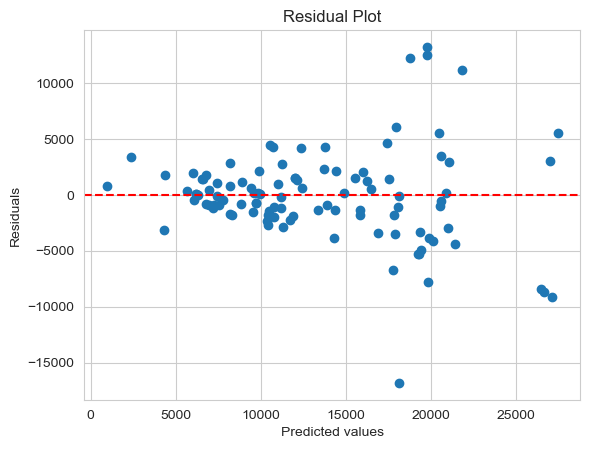

In [476]:
# Residual analysis # 
residuals = y_test - y_pred

# Plotting residuals # 
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [477]:
# Residuals after Linear model prediction #  

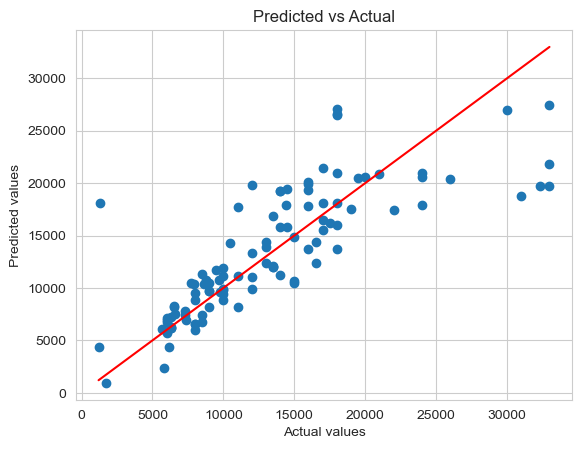

In [478]:
# Predicted vs Actual plot
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual')
plt.show()

In [479]:
# predicted vs Actual Values shown in Near Bset Fit line # 

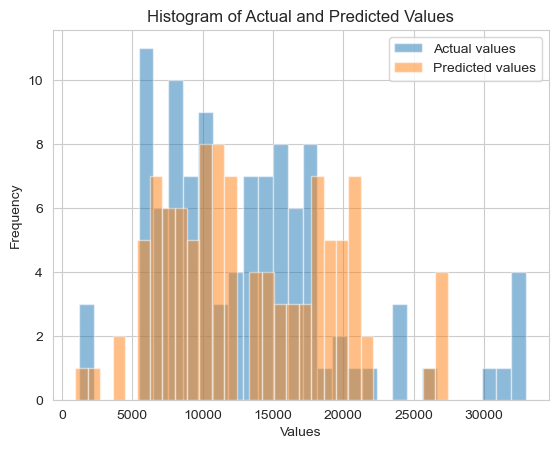

In [480]:
# Histograms # 
plt.hist(y_test, bins=30, alpha=0.5, label='Actual values')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Actual and Predicted Values')
plt.legend()
plt.show()

In [481]:
# comparision between actual and predicted values # 

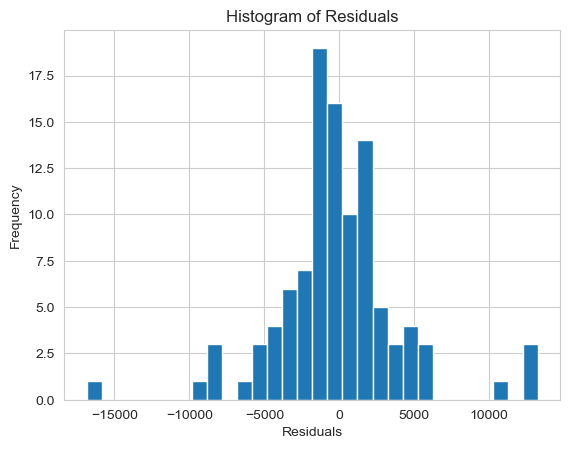

In [482]:
# Error analysis # 
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [483]:
                                               # feature importance analysis # 

In [484]:
# Print the coefficients of the model
coefficients = model.coef_

# Print the intercept
intercept = model.intercept_

# Combine feature names with their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coefficients
})

# Sort features by their importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance)


         Feature   Importance
3            RAM  1318.843172
8  Mobile Height   355.683670
2         Memory    51.909594
5    Rear Camera    45.005426
0          Model    10.139455
9     Processor_     1.657460
4       Battery_     1.297743
1         Colour    -0.934233
6   Front Camera  -225.702736
7        AI Lens -3013.463152


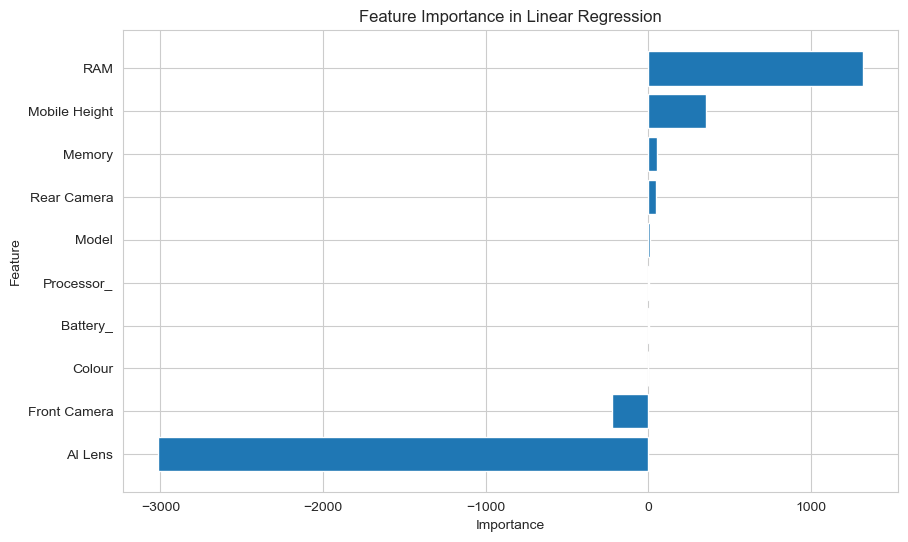

In [485]:

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression')
plt.gca().invert_yaxis()
plt.show()


In [486]:
# mobile height and RAM Are most important feature  followed by memory and color , rear camera ,model #
# AIlens , and Front camera is the least imporatant feature as per model


In [487]:
correlation = Mobile_dataset.corr()
print(correlation['Prize'])


Model           -0.075163
Colour           0.038895
Memory           0.566660
RAM              0.532024
Battery_        -0.034297
Rear Camera     -0.019597
Front Camera    -0.333833
AI Lens         -0.153691
Mobile Height    0.176009
Processor_      -0.050244
Prize            1.000000
Name: Prize, dtype: float64


In [488]:
                                   # Using cross Validation hyperparameter Tuning # 

In [489]:
final_model = Ridge(alpha=0.01)
final_model.fit(X, y)


Ridge(alpha=0.01)

In [490]:


# Generate a sample dataset
X, y = make_regression(n_samples=200, n_features=8, noise=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Ridge regression model
ridge = Ridge()

# Define hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Evaluate on Test Set
test_score = grid_search.best_estimator_.score(X_test, y_test)

# Display results
print(f"Best Alpha: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")
print(f"Test R² Score: {test_score}")


Best Alpha: {'alpha': 0.01}
Best Cross-Validation Score: 0.9999971140758246
Test R² Score: 0.9999980585407259


In [218]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error:" ,rmse)
print("R² Score:", r2)

Mean Squared Error (MSE): 2724822.2605843726
Root Mean Squared Error: 1650.7035653273342
R² Score: 0.9426022146576356


In [214]:

# Save the model to a file
joblib.dump(model, "linear_regression_model.pkl")


['linear_regression_model.pkl']

In [208]:
                      #  feature extraction and Mobile Phone price prediction conclusion #
# Data pre-processing perfomed on the dataset and ouliers removed .
# Label encoding is done for Catogorical Columns 
# Univariate bivariate and mutivariate analysis Done 
# Two models trained and evalauted i.e random forest regressor and linear regression 
# hyper parameter Tuning done for both the machine learning models .
# Feature Importance analysis is done in both the models .
# Linear  ridge regression  model performs the best in this case 


